# 7 Recurrent neural networks
In this exercise we will try a simple experiment with a recurrent neural network. One of the well-known recurrent neural network models is the so called Long short-term memory (LSTM) network. More information on LSTM can be found in the text [Understanding LSTM Networks](http://colah.github.io/posts/2015-08-Understanding-LSTMs/).

## 7.1 The MNIST dataset revisited (1)
In one of the previous exercises the MNIST dataset was used to demonstrate the use of multilayer perceptron. Here we are going to apply a recurrent neural network to the problem of digits classification. To keep it simple, we will use a simple LSTM network that will be fed with one row of the image at a time. With each new row, it will update its states and give its prediction. What we are interested in is its prediction after the last row i.e. after it has the full information.

In [54]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

# Constants
learning_rate = 0.001
num_epochs = 10
batch_size = 100
#we will feed a row at a time to the LSTM and there are 28 rows per image
timesteps = 28
#each row has 28 columns whose values are simultaneously passed to LSTM
n_input = 28 # MNIST data input (img shape: 28*28)
#the number of hidden states in the LSTM
n_hidden = 128
n_classes = 10

# Data transformation
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# Initialize the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LSTMModel(n_input, n_hidden, 1, n_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

timesteps_values = list(range(1, timesteps))
accuracy_values = []


# Training loop
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.view(-1, timesteps, n_input).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Test the model
    if (epoch + 1) % 1 == 0:
        with torch.no_grad():
            correct = 0
            total = 0
            for images, labels in test_loader:
                images = images.view(-1, timesteps, n_input).to(device)
                labels = labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

            accuracy = 100 * correct / total
            print(f'Epoch [{epoch + 1}/{num_epochs}], Test Accuracy: {accuracy:.2f}%')

Epoch [1/10], Test Accuracy: 96.67%
Epoch [2/10], Test Accuracy: 97.82%
Epoch [3/10], Test Accuracy: 98.04%
Epoch [4/10], Test Accuracy: 98.11%
Epoch [5/10], Test Accuracy: 98.35%
Epoch [6/10], Test Accuracy: 98.43%
Epoch [7/10], Test Accuracy: 98.62%
Epoch [8/10], Test Accuracy: 98.51%
Epoch [9/10], Test Accuracy: 98.71%
Epoch [10/10], Test Accuracy: 98.88%


**Tasks**

1. Study and run the code above.
2. Draw a plot that shows the relation between the number of rows given to the network and its final accuracy on the test set.
3. What happens if we use gradient descent instead of Adam?


In [58]:
timesteps_values = list(range(1, timesteps))
accuracy_values = []

for timesteps_value in timesteps_values: 
    # Training loop
        for i, (images, labels) in enumerate(train_loader):
            images = images.view(-1, timesteps, n_input)[:, :timesteps_value, :].to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # Test the model
        if (timesteps_value + 1) % 1 == 0:
            with torch.no_grad():
                correct = 0
                total = 0
                for images, labels in test_loader:
                    images = images.view(-1, timesteps, n_input)[:, :timesteps_value, :].to(device)
                    labels = labels.to(device)
                    outputs = model(images)
                    _, predicted = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()

                accuracy = 100 * correct / total
                accuracy_values.append(accuracy)
                print(f'Timesteps [{timesteps_value}], Test Accuracy: {accuracy:.2f}%')

Timesteps [1], Test Accuracy: 11.35%
Timesteps [2], Test Accuracy: 11.78%
Timesteps [3], Test Accuracy: 15.27%
Timesteps [4], Test Accuracy: 22.06%
Timesteps [5], Test Accuracy: 34.56%
Timesteps [6], Test Accuracy: 50.44%
Timesteps [7], Test Accuracy: 62.38%
Timesteps [8], Test Accuracy: 68.72%
Timesteps [9], Test Accuracy: 75.63%
Timesteps [10], Test Accuracy: 80.22%
Timesteps [11], Test Accuracy: 85.12%
Timesteps [12], Test Accuracy: 89.34%
Timesteps [13], Test Accuracy: 92.25%
Timesteps [14], Test Accuracy: 93.74%
Timesteps [15], Test Accuracy: 94.56%
Timesteps [16], Test Accuracy: 95.55%
Timesteps [17], Test Accuracy: 96.57%
Timesteps [18], Test Accuracy: 96.98%
Timesteps [19], Test Accuracy: 97.39%
Timesteps [20], Test Accuracy: 97.53%
Timesteps [21], Test Accuracy: 97.48%
Timesteps [22], Test Accuracy: 97.54%
Timesteps [23], Test Accuracy: 97.40%
Timesteps [24], Test Accuracy: 97.57%
Timesteps [25], Test Accuracy: 97.66%
Timesteps [26], Test Accuracy: 97.89%
Timesteps [27], Test 

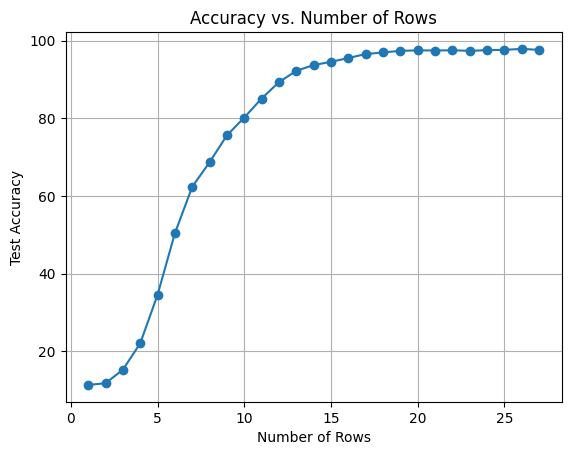

In [60]:
import matplotlib.pyplot as plt


# Plotting
plt.plot(timesteps_values, accuracy_values, marker='o')
plt.title('Accuracy vs. Number of Rows')
plt.xlabel('Number of Rows')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.show()

In [62]:
optimizer_gradient_descent = optim.SGD(model.parameters(), lr=learning_rate)

accuracies_w_gradient_descent = []
# Training loop
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.view(-1, timesteps, n_input).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        optimizer_gradient_descent.zero_grad()
        loss.backward()
        optimizer_gradient_descent.step()

    # Test the model
    if (epoch + 1) % 1 == 0:
        with torch.no_grad():
            correct = 0
            total = 0
            for images, labels in test_loader:
                images = images.view(-1, timesteps, n_input).to(device)
                labels = labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

            accuracy = 100 * correct / total
            accuracies_w_gradient_descent.append(accuracy)
            print(f'Epoch [{epoch + 1}/{num_epochs}], Test Accuracy: {accuracy:.2f}%')

Epoch [1/10], Test Accuracy: 97.73%
Epoch [2/10], Test Accuracy: 97.80%
Epoch [3/10], Test Accuracy: 97.83%
Epoch [4/10], Test Accuracy: 97.87%
Epoch [5/10], Test Accuracy: 97.93%
Epoch [6/10], Test Accuracy: 97.94%
Epoch [7/10], Test Accuracy: 97.97%
Epoch [8/10], Test Accuracy: 97.98%
Epoch [9/10], Test Accuracy: 97.99%
Epoch [10/10], Test Accuracy: 98.05%


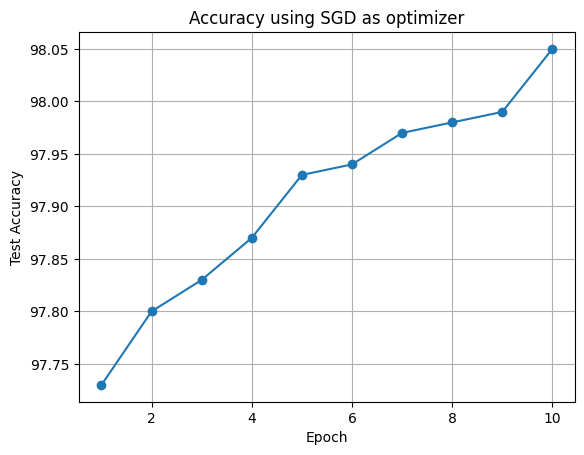

In [64]:
# Corresponding number of rows (timesteps)
num_rows_values = list(range(1, num_epochs + 1))

# Plotting
plt.plot(num_rows_values, accuracies_w_gradient_descent, marker='o')
plt.title('Accuracy using SGD as optimizer')
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.show()

If we use gradient descent instead of Adam as our optimization algorithm, we can observe that SGD achieves a consistently high test accuracy with a steady increase over epochs, also accuracy remains relatively stable, with a slight improvement in each epoch when using SGD as optimizer.

**In conclusion, SGD appears to converge slightly faster and more steadily in my case.**

# 8 Convolutional neural networks


The goal of this exercise is to learn the basic stuff about [convolutional neural networks](https://en.wikipedia.org/wiki/Convolutional_neural_network) (CNN or ConvNet). In the previous exercises, the building blocks mostly included simple operations that had some kind of activations functions and each layer was usually fully connected to the previous one. CNNs take into account the spatial nature of the input data, e.g. an image, and they process it by applying one or more  [kernels](https://en.wikipedia.org/wiki/Kernel_%28image_processing%29). In the case of images, this processing i.e. convolving is also known as filtering. The results of processing the input with a single kernel will be a single channel, but usually a convolutional layer involves more kernels producing more channels. These channels are often called **feature maps** because each kernel is specialized for extraction of a certain kind of features from the input. These feature maps are then combined into a single tensor that can be viewed as an image with multiple channels that can be then passed to further convolutional layers.

For example, if the input consists of a grayscale image i.e. an image with only one channel and a $5\times 5$ kernel is applied, the result is a single feature map. The borders of the input image are usually padded with zeros to ensure that the resulting feature maps has the same number of rows and columns as the input image.

If the input consists of a color image i.e. an image with three channels and a $5\times 5$ kernel is applied, what will actually be applied is an $5\times 5\times 3$ kernel that will simultaneously process all three channels and the result will again be a single feature map. However, if e.g. 16 several kernels are applied, then the result will be 16 feature maps. Should they be passed to another convolutional layer, **each** of its kernels would simultaneously process **all** feature maps so their sizes would be e.g. $3\times 3\times 16$ or $5\times 5\times 16$ where 16 is used to reach all feature maps simultaneously.

The convolution is usually followed by applying an element-wise non-linear operation to each of the values in the feature maps. Finally, what often follows is the summarization i.e. pooling of the information in the feature maps to reduce the spatial dimensions and keep only the most important information. A common approach used here is the so called max pooling. It is a non-linear downsampling where the input is divided into a set of non-overlapping rectangles and for each of them only the maximum value inside of it is kept.

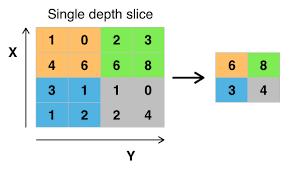
<center>Figure 1. Max pooling with $2\times 2$ rectangles (taken from [Wikipedia](https://en.wikipedia.org/wiki/File:Max_pooling.png)).</center>

What usually follows after several convolutional layers is putting the values of all feature maps into a single vector, which is then passed further to fully connected or other kinds of layers.

The number of parameters in the convolutional depends on the number of feature maps and the sizes of the kernels. For example, if a convolutional layer with 32 kernels of nominal size $3\times 3$ receives 16 feature maps on its input, it will require $16\times 3\times 3\times 32+32$ where the last 32 parameters refer to the kernel biases.

## 8.1 The MNIST dataset revisited (2)
In one of the previous exercises the MNIST dataset was used to demonstrate the use of multilayer perceptron. Here we are going to apply a convolutional neural network to the digit classification problem. We will use the following layers to build our model:

* [torch.nn.ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU)
* [torch.nn.Conv2d](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html#torch.nn.Conv2d)
* [torch.nn.MaxPool2d](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html#torch.nn.MaxPool2d)
* [torch.nn.Linear](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear)

The [torch.nn.Linear](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear) layer has the same effect as the fully connected layer, a matrix multiplication that was used in the previous exercise with the MNIST dataset.

**Tasks**

1. Study and run the code below. How is the accuracy compared to the ones obtained in the previous exerises with MNIST?
2. Try to change the number and size of convolutional and fully connected layers. What has the greatest impact on the accuracy? For each network architecture configuration calculate the number of trainable parameters.
3. What happens to the accuracy if another [non-linearity](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity) is used instead of ReLU? Experiment with at least two different activation functions.

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import tqdm

In [18]:
class CNN(nn.Module):

  # Method that defines the layers and other components of a model
  def __init__(self,
               input_channels,
               n_channels_1,
               n_channels_2,
               n_fully_connected,
               n_classes,
               kernel_size
               ):

    super(CNN, self).__init__()

    self.conv1 = nn.Conv2d(in_channels=input_channels,
                           out_channels=n_channels_1,
                           kernel_size=kernel_size,
                           padding='same'
                           )

    self.relu1 = nn.ReLU()

    self.maxpool1 = nn.MaxPool2d((2,2))

    self.conv2 = nn.Conv2d(in_channels=n_channels_1,
                           out_channels=n_channels_2,
                           kernel_size=kernel_size,
                           padding='same'
                           )

    self.relu2 = nn.ReLU()

    self.maxpool2 = nn.MaxPool2d((2,2))

    self.fc1 = nn.Linear(in_features=7*7*n_channels_2, out_features=n_fully_connected, bias=True)

    self.relu3 = nn.ReLU()

    self.fc2 = nn.Linear(in_features=n_fully_connected, out_features=n_classes, bias=True)

  # Method where the computation gets done
  def forward(self, x):

    # First convolutional layer
    # We will apply n_channels_1 kernels of size kernel_size X kernel_size
    # We are padding the input in order for the result to have the same number of rows and columns
    x = self.conv1(x)

    # Applying the non-linearity
    x = self.relu1(x)

    # and max pooling again, now each feature map will be of size 7 X 7
    x = self.maxpool1(x)

    # Second convolutional layer
    # We will apply n_channels_2 kernels of size kernel_size X kernel_size
    x = self.conv2(x)

    # again, we apply the non-linearity
    x = self.relu2(x)

    # and max pooling again, now each feature map will be of size 7 X 7
    x = self.maxpool2(x)

    # Flatten all dimensions except the batch
    x = torch.flatten(x, 1)

    # Fully connected layer
    x = self.fc1(x)

    # and again, we apply the non-linearity
    x = self.relu3(x)

    # Non-linearity
    pred_logits = self.fc2(x)

    return pred_logits


In [19]:
def train_epoch(model, device, train_dataloader, optimizer, epoch):

    model.train()

    train_loss = 0.0

    for batch in tqdm.tqdm(train_dataloader):

      # Every data instance is an input image + label pair
      images, labels = batch

      # It is necessary to have both the model, and the data on the same device, either CPU or GPU, for the model to process data.
      # Data on CPU and model on GPU, or vice-versa, will result in a Runtime error.
      images, labels = images.to(device), labels.to(device)

      # Zero your gradients for every batch
      optimizer.zero_grad()

      # Make predictions for this batch
      pred_logits = model(images)

      # Compute the loss
      loss = loss_fn(pred_logits, labels)

      # Calculates the backward gradients over the learning weights
      loss.backward()

      # Tells the optimizer to perform one learning step
      # Adjust the model�s learning weights based on the observed gradients for this batch
      optimizer.step()

      train_loss += loss.item()

    # Print epoch's average loss
    print("Epoch {} - Training loss: {}".format(epoch+1, train_loss/len(train_dataloader)))


def evaluation(model, device, test_dataloader, epoch):

    # Sets layers like dropout and batch normalization to evaluation mode before running inference
    # Failing to do this will yield inconsistent inference results
    model.eval()

    test_accuracy = 0.0

    # Disabling gradient calculation is useful for inference, when you are sure that you will not call Tensor.backward().
    # It will reduce memory consumption for computations that would otherwise have requires_grad=True.
    with torch.no_grad():

      for batch in tqdm.tqdm(test_dataloader):

        images, labels = batch

        images, labels = images.to(device), labels.to(device)

        pred_logits = model(images)

        probabilities = torch.nn.functional.softmax(pred_logits, dim=1)

        # Find the index of the highest probability
        predictions = probabilities.argmax(dim=1)

        # Caluculate average batch accuracy
        batch_accuracy = torch.mean((predictions == labels).float())

        test_accuracy += batch_accuracy

      print("Epoch {} - Accuracy: {}".format(epoch+1, test_accuracy/len(test_dataloader)))




In [20]:
# Architecture configs
input_channels=1
n_channels_1=32
n_channels_2=64
n_classes=10
n_fully_connected=128
kernel_size=5

# Training configs
training_epochs_count = 5
batch_size = 64
learning_rate = 0.001
display_step=1

# Model
model = CNN(input_channels, n_channels_1, n_channels_2, n_fully_connected, n_classes, kernel_size)

# Move model to GPU if possible
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

# Augmentations
transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

# Stores the samples and their corresponding labels
train_dataset = datasets.MNIST('../data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('../data', train=False, transform=transform)

# Wraps an iterable around the Dataset to enable easy access to the samples.
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 316177126.46it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 99700159.53it/s]

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 147353547.46it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw




100%|██████████| 4542/4542 [00:00<00:00, 7753572.96it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



In [21]:
# Define loss function
loss_fn = nn.CrossEntropyLoss()

# Define optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training
for epoch in range(training_epochs_count):

  train_epoch(model, device, train_dataloader, optimizer, epoch)

  if (epoch + 1) % display_step == 0:

    evaluation(model, device, test_dataloader, epoch)



100%|██████████| 938/938 [00:14<00:00, 64.65it/s]


Epoch 1 - Training loss: 0.11488066453801672


100%|██████████| 157/157 [00:02<00:00, 75.41it/s]


Epoch 1 - Accuracy: 0.984375


100%|██████████| 938/938 [00:14<00:00, 66.86it/s]


Epoch 2 - Training loss: 0.038377363448414005


100%|██████████| 157/157 [00:02<00:00, 77.85it/s]


Epoch 2 - Accuracy: 0.9871616363525391


100%|██████████| 938/938 [00:14<00:00, 66.74it/s]


Epoch 3 - Training loss: 0.02699944500303617


100%|██████████| 157/157 [00:02<00:00, 72.57it/s]


Epoch 3 - Accuracy: 0.9880573153495789


100%|██████████| 938/938 [00:14<00:00, 66.75it/s]


Epoch 4 - Training loss: 0.020985970914107636


100%|██████████| 157/157 [00:02<00:00, 78.41it/s]


Epoch 4 - Accuracy: 0.9908439517021179


100%|██████████| 938/938 [00:14<00:00, 66.55it/s]


Epoch 5 - Training loss: 0.015905079765705595


100%|██████████| 157/157 [00:02<00:00, 77.00it/s]

Epoch 5 - Accuracy: 0.990346372127533


- LSTM with Adam optimizer: Test Accuracy 98.22%
- LSTM with SGD optimizer: Test Accuracy 98.90%
- CNN: Test Accuracy 99.03%

**In summary, the CNN outperformed both LSTM models in terms of accuracy on the MNIST dataset.**


In [23]:
#function for calculating the number of trainable parameters in the model.
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


In [24]:
# Define the ranges for grid search
channel_1_values = [32, 64]
channel_2_values = [64, 128]
fully_connected_values = [128, 256]

# Dictionary to store models
models = {}

# Index counter for naming each architecture
index_counter = 1

# Perform grid search
for n_channels_1 in channel_1_values:
    for n_channels_2 in channel_2_values:
        for n_fully_connected in fully_connected_values:
            # Create and train the model with current hyperparameters
            model = CNN(input_channels, n_channels_1, n_channels_2, n_fully_connected, n_classes, kernel_size=5)  
            model.to(device)

            # Define loss function
            loss_fn = nn.CrossEntropyLoss()

            # Define optimizer
            optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

            # Training loop
            for epoch in range(training_epochs_count):
                train_epoch(model, device, train_dataloader, optimizer, epoch)

                if (epoch + 1) % display_step == 0:
                    evaluation(model, device, test_dataloader, epoch)

            # Save the model in the dictionary
            model_key = f"{index_counter}_architecture"
            models[model_key] = model

            # Increment index counter
            index_counter += 1

            # Print current hyperparameters and accuracy
            print(f"Model {model_key}: Hyperparameters - n_channels_1={n_channels_1}, n_channels_2={n_channels_2}, "
                  f"n_fully_connected={n_fully_connected}, kernel_size=5")

100%|██████████| 938/938 [00:14<00:00, 66.22it/s]


Epoch 1 - Training loss: 0.12084598535126242


100%|██████████| 157/157 [00:02<00:00, 76.49it/s]


Epoch 1 - Accuracy: 0.9850716590881348


100%|██████████| 938/938 [00:14<00:00, 65.24it/s]


Epoch 2 - Training loss: 0.0401513973584345


100%|██████████| 157/157 [00:02<00:00, 73.04it/s]


Epoch 2 - Accuracy: 0.987460196018219


100%|██████████| 938/938 [00:14<00:00, 64.68it/s]


Epoch 3 - Training loss: 0.028046231503595722


100%|██████████| 157/157 [00:02<00:00, 76.16it/s]


Epoch 3 - Accuracy: 0.9906449317932129


100%|██████████| 938/938 [00:14<00:00, 65.04it/s]


Epoch 4 - Training loss: 0.01938518175494677


100%|██████████| 157/157 [00:02<00:00, 76.53it/s]


Epoch 4 - Accuracy: 0.990744411945343


100%|██████████| 938/938 [00:14<00:00, 65.25it/s]


Epoch 5 - Training loss: 0.01579659975716479


100%|██████████| 157/157 [00:02<00:00, 76.25it/s]


Epoch 5 - Accuracy: 0.9889530539512634
Model 1_architecture: Hyperparameters - n_channels_1=32, n_channels_2=64, n_fully_connected=128, kernel_size=5


100%|██████████| 938/938 [00:14<00:00, 65.10it/s]


Epoch 1 - Training loss: 0.11117338110890879


100%|██████████| 157/157 [00:02<00:00, 74.69it/s]


Epoch 1 - Accuracy: 0.984375


100%|██████████| 938/938 [00:14<00:00, 65.90it/s]


Epoch 2 - Training loss: 0.03788297840092244


100%|██████████| 157/157 [00:02<00:00, 76.36it/s]


Epoch 2 - Accuracy: 0.9862659573554993


100%|██████████| 938/938 [00:14<00:00, 64.41it/s]


Epoch 3 - Training loss: 0.024626382854075386


100%|██████████| 157/157 [00:02<00:00, 70.14it/s]


Epoch 3 - Accuracy: 0.9912420511245728


100%|██████████| 938/938 [00:14<00:00, 65.11it/s]


Epoch 4 - Training loss: 0.019622291188044445


100%|██████████| 157/157 [00:02<00:00, 72.66it/s]


Epoch 4 - Accuracy: 0.9896497130393982


100%|██████████| 938/938 [00:14<00:00, 65.00it/s]


Epoch 5 - Training loss: 0.01584575427007666


100%|██████████| 157/157 [00:02<00:00, 77.14it/s]


Epoch 5 - Accuracy: 0.9918391704559326
Model 2_architecture: Hyperparameters - n_channels_1=32, n_channels_2=64, n_fully_connected=256, kernel_size=5


100%|██████████| 938/938 [00:14<00:00, 62.56it/s]


Epoch 1 - Training loss: 0.1092052718043389


100%|██████████| 157/157 [00:02<00:00, 73.23it/s]


Epoch 1 - Accuracy: 0.9884554147720337


100%|██████████| 938/938 [00:15<00:00, 62.38it/s]


Epoch 2 - Training loss: 0.03515351919838583


100%|██████████| 157/157 [00:02<00:00, 75.72it/s]


Epoch 2 - Accuracy: 0.9858678579330444


100%|██████████| 938/938 [00:14<00:00, 64.16it/s]


Epoch 3 - Training loss: 0.025886869412161277


100%|██████████| 157/157 [00:02<00:00, 76.76it/s]


Epoch 3 - Accuracy: 0.990047812461853


100%|██████████| 938/938 [00:14<00:00, 62.95it/s]


Epoch 4 - Training loss: 0.01796417182580052


100%|██████████| 157/157 [00:02<00:00, 76.70it/s]


Epoch 4 - Accuracy: 0.9919387102127075


100%|██████████| 938/938 [00:14<00:00, 62.69it/s]


Epoch 5 - Training loss: 0.014354452799924243


100%|██████████| 157/157 [00:02<00:00, 75.37it/s]


Epoch 5 - Accuracy: 0.9911425113677979
Model 3_architecture: Hyperparameters - n_channels_1=32, n_channels_2=128, n_fully_connected=128, kernel_size=5


100%|██████████| 938/938 [00:14<00:00, 63.38it/s]


Epoch 1 - Training loss: 0.11333822122830123


100%|██████████| 157/157 [00:02<00:00, 77.12it/s]


Epoch 1 - Accuracy: 0.9879578351974487


100%|██████████| 938/938 [00:14<00:00, 63.42it/s]


Epoch 2 - Training loss: 0.038347938616917945


100%|██████████| 157/157 [00:02<00:00, 76.37it/s]


Epoch 2 - Accuracy: 0.9896497130393982


100%|██████████| 938/938 [00:14<00:00, 62.88it/s]


Epoch 3 - Training loss: 0.024145733172640276


100%|██████████| 157/157 [00:02<00:00, 71.99it/s]


Epoch 3 - Accuracy: 0.9926353693008423


100%|██████████| 938/938 [00:14<00:00, 63.32it/s]


Epoch 4 - Training loss: 0.017903799297462233


100%|██████████| 157/157 [00:02<00:00, 75.61it/s]


Epoch 4 - Accuracy: 0.9901472926139832


100%|██████████| 938/938 [00:15<00:00, 62.27it/s]


Epoch 5 - Training loss: 0.01445985885929947


100%|██████████| 157/157 [00:02<00:00, 74.51it/s]


Epoch 5 - Accuracy: 0.990744411945343
Model 4_architecture: Hyperparameters - n_channels_1=32, n_channels_2=128, n_fully_connected=256, kernel_size=5


100%|██████████| 938/938 [00:14<00:00, 63.97it/s]


Epoch 1 - Training loss: 0.11429939881173908


100%|██████████| 157/157 [00:02<00:00, 72.97it/s]


Epoch 1 - Accuracy: 0.9839769005775452


100%|██████████| 938/938 [00:14<00:00, 63.93it/s]


Epoch 2 - Training loss: 0.038847468089082585


100%|██████████| 157/157 [00:02<00:00, 74.85it/s]


Epoch 2 - Accuracy: 0.9911425113677979


100%|██████████| 938/938 [00:14<00:00, 64.66it/s]


Epoch 3 - Training loss: 0.025538947853222013


100%|██████████| 157/157 [00:02<00:00, 74.37it/s]


Epoch 3 - Accuracy: 0.9896497130393982


100%|██████████| 938/938 [00:14<00:00, 64.27it/s]


Epoch 4 - Training loss: 0.01986459126135602


100%|██████████| 157/157 [00:01<00:00, 79.56it/s]


Epoch 4 - Accuracy: 0.9908439517021179


100%|██████████| 938/938 [00:14<00:00, 64.77it/s]


Epoch 5 - Training loss: 0.014651372971474475


100%|██████████| 157/157 [00:02<00:00, 74.27it/s]


Epoch 5 - Accuracy: 0.9918391704559326
Model 5_architecture: Hyperparameters - n_channels_1=64, n_channels_2=64, n_fully_connected=128, kernel_size=5


100%|██████████| 938/938 [00:14<00:00, 64.60it/s]


Epoch 1 - Training loss: 0.10767046618821428


100%|██████████| 157/157 [00:02<00:00, 77.33it/s]


Epoch 1 - Accuracy: 0.9862659573554993


100%|██████████| 938/938 [00:14<00:00, 63.89it/s]


Epoch 2 - Training loss: 0.03705776339879747


100%|██████████| 157/157 [00:02<00:00, 75.14it/s]


Epoch 2 - Accuracy: 0.9894506335258484


100%|██████████| 938/938 [00:14<00:00, 64.20it/s]


Epoch 3 - Training loss: 0.02560858254846588


100%|██████████| 157/157 [00:02<00:00, 75.25it/s]


Epoch 3 - Accuracy: 0.9892516136169434


100%|██████████| 938/938 [00:14<00:00, 63.65it/s]


Epoch 4 - Training loss: 0.01816290924766797


100%|██████████| 157/157 [00:02<00:00, 75.34it/s]


Epoch 4 - Accuracy: 0.9892516136169434


100%|██████████| 938/938 [00:14<00:00, 64.21it/s]


Epoch 5 - Training loss: 0.015480027042598462


100%|██████████| 157/157 [00:02<00:00, 77.79it/s]


Epoch 5 - Accuracy: 0.9883559346199036
Model 6_architecture: Hyperparameters - n_channels_1=64, n_channels_2=64, n_fully_connected=256, kernel_size=5


100%|██████████| 938/938 [00:15<00:00, 60.56it/s]


Epoch 1 - Training loss: 0.11436843024944064


100%|██████████| 157/157 [00:02<00:00, 77.72it/s]


Epoch 1 - Accuracy: 0.9799960255622864


100%|██████████| 938/938 [00:15<00:00, 61.57it/s]


Epoch 2 - Training loss: 0.03860349488988663


100%|██████████| 157/157 [00:02<00:00, 75.69it/s]


Epoch 2 - Accuracy: 0.9873606562614441


100%|██████████| 938/938 [00:15<00:00, 60.42it/s]


Epoch 3 - Training loss: 0.025047687183695298


100%|██████████| 157/157 [00:02<00:00, 75.94it/s]


Epoch 3 - Accuracy: 0.9887539744377136


100%|██████████| 938/938 [00:15<00:00, 61.03it/s]


Epoch 4 - Training loss: 0.01791688322791083


100%|██████████| 157/157 [00:02<00:00, 77.19it/s]


Epoch 4 - Accuracy: 0.9893511533737183


100%|██████████| 938/938 [00:15<00:00, 60.39it/s]


Epoch 5 - Training loss: 0.015302547575183411


100%|██████████| 157/157 [00:02<00:00, 77.89it/s]


Epoch 5 - Accuracy: 0.9885549545288086
Model 7_architecture: Hyperparameters - n_channels_1=64, n_channels_2=128, n_fully_connected=128, kernel_size=5


100%|██████████| 938/938 [00:15<00:00, 61.57it/s]


Epoch 1 - Training loss: 0.12100700861022277


100%|██████████| 157/157 [00:02<00:00, 73.88it/s]


Epoch 1 - Accuracy: 0.9867635369300842


100%|██████████| 938/938 [00:15<00:00, 61.15it/s]


Epoch 2 - Training loss: 0.03978660490526669


100%|██████████| 157/157 [00:02<00:00, 77.63it/s]


Epoch 2 - Accuracy: 0.9880573153495789


100%|██████████| 938/938 [00:15<00:00, 60.57it/s]


Epoch 3 - Training loss: 0.026067869463709117


100%|██████████| 157/157 [00:02<00:00, 77.49it/s]


Epoch 3 - Accuracy: 0.9914410710334778


100%|██████████| 938/938 [00:15<00:00, 61.61it/s]


Epoch 4 - Training loss: 0.02024858795925817


100%|██████████| 157/157 [00:02<00:00, 75.58it/s]


Epoch 4 - Accuracy: 0.9902468323707581


100%|██████████| 938/938 [00:15<00:00, 60.63it/s]


Epoch 5 - Training loss: 0.014971344256439192


100%|██████████| 157/157 [00:02<00:00, 77.11it/s]

Epoch 5 - Accuracy: 0.9911425113677979
Model 8_architecture: Hyperparameters - n_channels_1=64, n_channels_2=128, n_fully_connected=256, kernel_size=5


Based on the outputs of my grid search, it seems that changing the number of fully connected neurons (n_fully_connected) has a significant impact on the accuracy.

Looking just models, **Model 2_architecture** has the highest accuracy (99.184%) among the tested configurations. 

In [26]:
for model_key, model in models.items():
    num_parameters = count_parameters(model)
    print(f"Model {model_key}: Number of Trainable Parameters - {num_parameters}")

Model 1_architecture: Number of Trainable Parameters - 454922
Model 2_architecture: Number of Trainable Parameters - 857738
Model 3_architecture: Number of Trainable Parameters - 907594
Model 4_architecture: Number of Trainable Parameters - 1711818
Model 5_architecture: Number of Trainable Parameters - 506954
Model 6_architecture: Number of Trainable Parameters - 909770
Model 7_architecture: Number of Trainable Parameters - 1010826
Model 8_architecture: Number of Trainable Parameters - 1815050


In [27]:
#using 
class CNN(nn.Module):

  # Method that defines the layers and other components of a model
  def __init__(self,
               input_channels,
               n_channels_1,
               n_channels_2,
               n_fully_connected,
               n_classes,
               kernel_size
               ):

    super(CNN, self).__init__()

    self.conv1 = nn.Conv2d(in_channels=input_channels,
                           out_channels=n_channels_1,
                           kernel_size=kernel_size,
                           padding='same'
                           )

    self.sigmoid1 = nn.Sigmoid()

    self.maxpool1 = nn.MaxPool2d((2,2))

    self.conv2 = nn.Conv2d(in_channels=n_channels_1,
                           out_channels=n_channels_2,
                           kernel_size=kernel_size,
                           padding='same'
                           )

    self.sigmoid2 = nn.Sigmoid()

    self.maxpool2 = nn.MaxPool2d((2,2))

    self.fc1 = nn.Linear(in_features=7*7*n_channels_2, out_features=n_fully_connected, bias=True)

    self.sigmoid3 = nn.Sigmoid()

    self.fc2 = nn.Linear(in_features=n_fully_connected, out_features=n_classes, bias=True)

  # Method where the computation gets done
  def forward(self, x):

    # First convolutional layer
    # We will apply n_channels_1 kernels of size kernel_size X kernel_size
    # We are padding the input in order for the result to have the same number of rows and columns
    x = self.conv1(x)

    # Applying the non-linearity
    x = self.sigmoid1(x)

    # and max pooling again, now each feature map will be of size 7 X 7
    x = self.maxpool1(x)

    # Second convolutional layer
    # We will apply n_channels_2 kernels of size kernel_size X kernel_size
    x = self.conv2(x)

    # again, we apply the non-linearity
    x = self.sigmoid2(x)

    # and max pooling again, now each feature map will be of size 7 X 7
    x = self.maxpool2(x)

    # Flatten all dimensions except the batch
    x = torch.flatten(x, 1)

    # Fully connected layer
    x = self.fc1(x)

    # and again, we apply the non-linearity
    x = self.sigmoid3(x)

    # Non-linearity
    pred_logits = self.fc2(x)

    return pred_logits

In [28]:
# Architecture configs
input_channels=1
n_channels_1=32
n_channels_2=64
n_classes=10
n_fully_connected=128
kernel_size=5

# Training configs
training_epochs_count = 5
batch_size = 64
learning_rate = 0.001
display_step=1

# Model
model_sigmoid = CNN(input_channels, n_channels_1, n_channels_2, n_fully_connected, n_classes, kernel_size)

# Define loss function
loss_fn = nn.CrossEntropyLoss()

# Define optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training
for epoch in range(training_epochs_count):

  train_epoch(model, device, train_dataloader, optimizer, epoch)

  if (epoch + 1) % display_step == 0:

    evaluation(model, device, test_dataloader, epoch)

100%|██████████| 938/938 [00:15<00:00, 60.04it/s]


Epoch 1 - Training loss: 0.01678839928613265


100%|██████████| 157/157 [00:02<00:00, 72.06it/s]


Epoch 1 - Accuracy: 0.9881568551063538


100%|██████████| 938/938 [00:15<00:00, 60.16it/s]


Epoch 2 - Training loss: 0.01003684597267849


100%|██████████| 157/157 [00:02<00:00, 76.59it/s]


Epoch 2 - Accuracy: 0.9885549545288086


100%|██████████| 938/938 [00:15<00:00, 59.66it/s]


Epoch 3 - Training loss: 0.01034647139634048


100%|██████████| 157/157 [00:02<00:00, 75.49it/s]


Epoch 3 - Accuracy: 0.9876592755317688


100%|██████████| 938/938 [00:15<00:00, 60.26it/s]


Epoch 4 - Training loss: 0.008925894190710376


100%|██████████| 157/157 [00:02<00:00, 75.78it/s]


Epoch 4 - Accuracy: 0.9924363493919373


100%|██████████| 938/938 [00:15<00:00, 59.41it/s]


Epoch 5 - Training loss: 0.007587560464789254


100%|██████████| 157/157 [00:02<00:00, 75.23it/s]

Epoch 5 - Accuracy: 0.9912420511245728


In this specific case, using **Sigmoid** seems to yield slightly higher accuracy during some epochs compared to ReLU. 

Final accurary when using Sigmoid is **slightly larger** then using ReLu

In [30]:
#using 
class CNN(nn.Module):

  # Method that defines the layers and other components of a model
  def __init__(self,
               input_channels,
               n_channels_1,
               n_channels_2,
               n_fully_connected,
               n_classes,
               kernel_size
               ):

    super(CNN, self).__init__()

    self.conv1 = nn.Conv2d(in_channels=input_channels,
                           out_channels=n_channels_1,
                           kernel_size=kernel_size,
                           padding='same'
                           )

    self.Hardtanh1 = nn.Hardtanh()

    self.maxpool1 = nn.MaxPool2d((2,2))

    self.conv2 = nn.Conv2d(in_channels=n_channels_1,
                           out_channels=n_channels_2,
                           kernel_size=kernel_size,
                           padding='same'
                           )

    self.Hardtanh2 = nn.Hardtanh()

    self.maxpool2 = nn.MaxPool2d((2,2))

    self.fc1 = nn.Linear(in_features=7*7*n_channels_2, out_features=n_fully_connected, bias=True)

    self.Hardtanh3 = nn.Hardtanh()

    self.fc2 = nn.Linear(in_features=n_fully_connected, out_features=n_classes, bias=True)

  # Method where the computation gets done
  def forward(self, x):

    # First convolutional layer
    # We will apply n_channels_1 kernels of size kernel_size X kernel_size
    # We are padding the input in order for the result to have the same number of rows and columns
    x = self.conv1(x)

    # Applying the non-linearity
    x = self.Hardtanh1(x)

    # and max pooling again, now each feature map will be of size 7 X 7
    x = self.maxpool1(x)

    # Second convolutional layer
    # We will apply n_channels_2 kernels of size kernel_size X kernel_size
    x = self.conv2(x)

    # again, we apply the non-linearity
    x = self.Hardtanh2(x)

    # and max pooling again, now each feature map will be of size 7 X 7
    x = self.maxpool2(x)

    # Flatten all dimensions except the batch
    x = torch.flatten(x, 1)

    # Fully connected layer
    x = self.fc1(x)

    # and again, we apply the non-linearity
    x = self.Hardtanh3(x)

    # Non-linearity
    pred_logits = self.fc2(x)

    return pred_logits

In [31]:
# Architecture configs
input_channels=1
n_channels_1=32
n_channels_2=64
n_classes=10
n_fully_connected=128
kernel_size=5

# Training configs
training_epochs_count = 5
batch_size = 64
learning_rate = 0.001
display_step=1

# Model
model_hard_than = CNN(input_channels, n_channels_1, n_channels_2, n_fully_connected, n_classes, kernel_size)

# Define loss function
loss_fn = nn.CrossEntropyLoss()

# Define optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training
for epoch in range(training_epochs_count):

  train_epoch(model, device, train_dataloader, optimizer, epoch)

  if (epoch + 1) % display_step == 0:

    evaluation(model, device, test_dataloader, epoch)

100%|██████████| 938/938 [00:15<00:00, 60.56it/s]


Epoch 1 - Training loss: 0.009652400466326596


100%|██████████| 157/157 [00:02<00:00, 75.92it/s]


Epoch 1 - Accuracy: 0.9876592755317688


100%|██████████| 938/938 [00:15<00:00, 60.38it/s]


Epoch 2 - Training loss: 0.006328557174172927


100%|██████████| 157/157 [00:02<00:00, 75.12it/s]


Epoch 2 - Accuracy: 0.990545392036438


100%|██████████| 938/938 [00:15<00:00, 60.96it/s]


Epoch 3 - Training loss: 0.007455881687330826


100%|██████████| 157/157 [00:02<00:00, 76.25it/s]


Epoch 3 - Accuracy: 0.9896497130393982


100%|██████████| 938/938 [00:15<00:00, 59.80it/s]


Epoch 4 - Training loss: 0.0037747270913363017


100%|██████████| 157/157 [00:02<00:00, 74.72it/s]


Epoch 4 - Accuracy: 0.9902468323707581


100%|██████████| 938/938 [00:15<00:00, 61.00it/s]


Epoch 5 - Training loss: 0.007510349024403278


100%|██████████| 157/157 [00:02<00:00, 75.01it/s]

Epoch 5 - Accuracy: 0.9902468323707581


In this specific case, using **HardTanh** seems to yield similar or slightly higher accuracy during some epochs compared to ReLU.

Final accuracy when using HardThan is **slightly smaller** when using ReLu

## 8.2 Image classification
Image classification is a challenging computer vision problem with the best-known competition being [The ImageNet Large Scale Visual Recognition Challenge (ILSVRC)](http://www.image-net.org/challenges/LSVRC/), which includes the ImageNet dataset with millions of $224\times 224$ training images. The class names in one of the tasks there can be found [here](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a). One of the most important breakthroughs was when in 2012 the convolutional neural network [AlexNet](https://en.wikipedia.org/wiki/AlexNet) won the first place. Ever since many highly successful convolutional neural networks architectures have been proposed, e.g. [VGG-16](https://arxiv.org/abs/1409.1556), [VGG-19](https://arxiv.org/abs/1409.1556), [ResNet](https://www.cv-foundation.org/openaccess/content_cvpr_2016/papers/He_Deep_Residual_Learning_CVPR_2016_paper.pdf), [Inception](https://arxiv.org/abs/1409.4842), etc. Training such networks requires a lot of time because they have many layers with millions of parameters. In this exercise we are going to experiment with pre-trained models of some of the best known architectures.

### 8.2.1 Using pre-trained models
Try running the following code:

In [9]:
import torchvision.models as models
from torchvision.io import read_image

# List of architectures to compare
architectures = ["resnet34", "vgg16", "vgg19", "inceptionv3"]
image_paths=["../input/cnn-img/cnn_img/badger.jpg", "../input/cnn-img/cnn_img/rabbit.jpg", "../input/cnn-img/cnn_img/sundial.jpg", "../input/cnn-img/cnn_img/pineapple.jpg", "../input/cnn-img/cnn_img/can.jpg"]

# Dictionary to store results
results = {}

# Iterate over architectures
for architecture in architectures:
    if architecture == "resnet34":
        weights = models.ResNet34_Weights.DEFAULT
        model = models.resnet34(weights=weights)
    elif architecture == "vgg16":
        weights = models.VGG16_Weights.DEFAULT
        model = models.vgg16(pretrained=weights)
    elif architecture == "vgg19":
        weights = models.VGG19_Weights.DEFAULT
        model = models.vgg19(pretrained=weights)
    elif architecture == "inceptionv3":
        weights = models.Inception_V3_Weights.DEFAULT
        model = models.inception_v3(pretrained=weights)

    model.eval()

    # List to store results for each image
    image_results = []

    for path in image_paths:
        # loading the image and rescaling it to fit the size for the imagenet architectures
        img = read_image(path)
        preprocess = weights.transforms(antialias=True)
        batch = preprocess(img).unsqueeze(0)

        prediction = model(batch).squeeze(0).softmax(0)
        class_id = prediction.argmax().item()
        score = prediction[class_id].item()
        category_name = weights.meta["categories"][class_id]

        image_results.append({"category": category_name, "score": score})

    results[architecture] = image_results

In [10]:
for architecture, image_results in results.items():
    print(f"\nResults for {architecture} architecture:")
    for idx, result in enumerate(image_results, start=1):
        print(f"Image {idx}: {result['category']} - {100 * result['score']:.1f}%")


Results for resnet34 architecture:
Image 1: badger - 99.5%
Image 2: wood rabbit - 89.4%
Image 3: sundial - 100.0%
Image 4: pineapple - 100.0%
Image 5: table lamp - 38.9%

Results for vgg16 architecture:
Image 1: badger - 100.0%
Image 2: wood rabbit - 98.9%
Image 3: sundial - 100.0%
Image 4: pineapple - 97.9%
Image 5: vase - 15.9%

Results for vgg19 architecture:
Image 1: badger - 100.0%
Image 2: wood rabbit - 97.3%
Image 3: sundial - 100.0%
Image 4: pineapple - 99.8%
Image 5: ashcan - 13.0%

Results for inceptionv3 architecture:
Image 1: badger - 95.4%
Image 2: wood rabbit - 90.6%
Image 3: sundial - 85.4%
Image 4: pineapple - 99.3%
Image 5: table lamp - 17.2%


**Tasks**
1. Is there any significant difference between the results of different architectures?
2. Try to classify several other images from the folders cnn_img/healthy and cnn_img/unhealthy that you choose on your own. Which cases are problematic?


For most images, **ResNet34** achieved high accuracy. VGG16 and VGG19 also performed well, but there are some differences in accuracy for specific images. InceptionV3 showed lower accuracy for some images compared to other architectures.

In [12]:
import os  

# Assuming the folders are named "healthy" and "unhealthy" inside "cnn_img"
healthy_folder_path = "../input/cnn-img/cnn_img/healthy"
unhealthy_folder_path = "../input/cnn-img/cnn_img/unhealthy"

# Function to classify images and print predictions
def classify_images(folder_path, model):
    image_paths = [os.path.join(folder_path, filename) for filename in os.listdir(folder_path) if filename.endswith(".jpg")]

    for path in image_paths:
        # Load and preprocess the image
        img = read_image(path)
        preprocess = weights.transforms(antialias=True)
        batch = preprocess(img).unsqueeze(0)

        # Make predictions
        prediction = model(batch).squeeze(0).softmax(0)
        class_id = prediction.argmax().item()
        score = prediction[class_id].item()
        category_name = weights.meta["categories"][class_id]

        # Print results
        print(f"Image: {path}")
        print(f"Prediction: {category_name} ({100 * score:.1f}%)")
        print("-" * 30)



# Classify images in the 'healthy' folder
print("Classifying Healthy Images:")
classify_images(healthy_folder_path, model)

print()
# Classify images in the 'unhealthy' folder
print("Classifying Unhealthy Images:")
classify_images(unhealthy_folder_path, model)

Classifying Healthy Images:
Image: ../input/cnn-img/cnn_img/healthy/45.jpg
Prediction: stinkhorn (14.0%)
------------------------------
Image: ../input/cnn-img/cnn_img/healthy/56.jpg
Prediction: Granny Smith (73.4%)
------------------------------
Image: ../input/cnn-img/cnn_img/healthy/89.jpg
Prediction: hamper (97.4%)
------------------------------
Image: ../input/cnn-img/cnn_img/healthy/20.jpg
Prediction: orange (83.1%)
------------------------------
Image: ../input/cnn-img/cnn_img/healthy/58.jpg
Prediction: eggnog (95.2%)
------------------------------
Image: ../input/cnn-img/cnn_img/healthy/6.jpg
Prediction: shopping basket (21.2%)
------------------------------
Image: ../input/cnn-img/cnn_img/healthy/76.jpg
Prediction: plate (32.3%)
------------------------------
Image: ../input/cnn-img/cnn_img/healthy/71.jpg
Prediction: hamper (48.1%)
------------------------------
Image: ../input/cnn-img/cnn_img/healthy/5.jpg
Prediction: fig (40.4%)
------------------------------
Image: ../input

The problematic cases are those with multiple different objects, where the trained model provides a weaker score. Conversely, on images featuring the same object or multiple instances of the same object, the model tends to yield a higher score.


### 8.2.2 Creating your own classifier - pincers vs. scissors
Although ImageNet has a lot of classes, sometimes they do not cover some desired cases. Let's assume that we want to tell images with pincers apart from the ones with scissors. Neither pincers nor scissors are among ImageNet classes. Nevertheless, we can still use some parts of the pre-trained models.

Various layers of a deep convolutional network have diferent tasks. The ones closest to the original input image usually look for features such as edges and corners i.e. for low-level features. After them there are layers that look for middle-level features such as circular objects, special curves, etc. Next, there are usually fully connected layers that create high-level semantic features by combining the information from the previous layers. These features are then used by the last layer that performs the actual classification. What we can do here is simply to discard the last layer i.e. not to calculate the class of an image, but to extract the values in on of the fully connected layers. This effectively means that we are going to use the network only as an extractor for high-level features that we would hardly be able to engineer on our own. Let's first see which layers can be found in the ResNet network:

In [13]:
import torchvision.models as models
import numpy as np

architecture="resnet34"

if architecture == "resnet34":
  weights = models.ResNet34_Weights.DEFAULT
  base_model = models.resnet34(weights=weights)
elif architecture == "resnet50":
  weights = models.ResNet50_Weights.DEFAULT
  base_model = models.resnet50(weights=weights)
elif architecture == "vgg16":
  weights = models.VGG16_Weights.DEFAULT
  base_model = models.vgg16(weights=weights)

for layer in base_model.children():
    print(layer)

Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
ReLU(inplace=True)
MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
Sequential(
  (0): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (1): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=Fal

At the end you can see fully connected layer used for classification. We can extract the values from previous layers by using the following code:

These values can now be used as features and that can later be used with another classifier. Let's first extract the features for our pincer and scissors images.

In [16]:
# Model without last fully connected layer
model = torch.nn.Sequential(*(list(base_model.children())[:-1]), nn.AdaptiveAvgPool2d(1))

img_path="../input/cnn-img/cnn_img/rabbit.jpg"

img = read_image(img_path)
preprocess = weights.transforms(antialias=True)
batch = preprocess(img).unsqueeze(0)

features = model(batch).squeeze(3).squeeze(2)

print(features.shape)
feature_layer_size=features.shape[1];

torch.Size([1, 512])


In [17]:
def create_numbered_paths(home_dir, n):
    return [home_dir+str(i)+".jpg" for i in range(n)]

def create_paired_numbered_paths(first_home_dir, second_home_dir, n):
    image_paths=[]
    for p in zip(create_numbered_paths(first_home_dir, n), create_numbered_paths(second_home_dir, n)):
        image_paths.extend(p)
    return image_paths

def create_features(paths, verbose=True):
    n=len(paths)
    features=np.zeros((n, feature_layer_size))
    for i in range(n):
        if (verbose==True):
            print("\t%2d / %2d"%(i+1, n))
        img = read_image(paths[i])
        preprocess = weights.transforms(antialias=True)
        batch = preprocess(img).unsqueeze(0)
        features[i, :]=model(batch).squeeze(3).squeeze(2).detach().numpy()

    return features

pincers_dir="../input/cnn-img/cnn_img/pincers/"
scissors_dir="../input/cnn-img/cnn_img/scissors/"

individual_n=50

#combining all image paths
image_paths=create_paired_numbered_paths(pincers_dir, scissors_dir, individual_n)

#marking their classes
image_classes=[]
for i in range(individual_n):
    #0 stands for the pincer image and 1 stands for the scissors image
    image_classes.extend((0, 1))

#number of all images
n=100
#number of training images
n_train=50
#number of test images
n_test=n-n_train

print("Creating training features...")
#here we will store the features of training images
x_train=create_features(image_paths[:n_train])
#train classes
y_train=np.array(image_classes[:n_train])

print("Creating test features...")
#here we will store the features of test images
x_test=create_features(image_paths[n_train:])

#train classes
y_test=np.array(image_classes[n_train:])

Creating training features...
	 1 / 50
	 2 / 50
	 3 / 50
	 4 / 50
	 5 / 50
	 6 / 50
	 7 / 50
	 8 / 50
	 9 / 50
	10 / 50
	11 / 50
	12 / 50
	13 / 50
	14 / 50
	15 / 50
	16 / 50
	17 / 50
	18 / 50
	19 / 50
	20 / 50
	21 / 50
	22 / 50
	23 / 50
	24 / 50
	25 / 50
	26 / 50
	27 / 50
	28 / 50
	29 / 50
	30 / 50
	31 / 50
	32 / 50
	33 / 50
	34 / 50
	35 / 50
	36 / 50
	37 / 50
	38 / 50
	39 / 50
	40 / 50
	41 / 50
	42 / 50
	43 / 50
	44 / 50
	45 / 50
	46 / 50
	47 / 50
	48 / 50
	49 / 50
	50 / 50
Creating test features...
	 1 / 50
	 2 / 50
	 3 / 50
	 4 / 50
	 5 / 50
	 6 / 50
	 7 / 50
	 8 / 50
	 9 / 50
	10 / 50
	11 / 50
	12 / 50
	13 / 50
	14 / 50
	15 / 50
	16 / 50
	17 / 50
	18 / 50
	19 / 50
	20 / 50
	21 / 50
	22 / 50
	23 / 50
	24 / 50
	25 / 50
	26 / 50
	27 / 50
	28 / 50
	29 / 50
	30 / 50
	31 / 50
	32 / 50
	33 / 50
	34 / 50
	35 / 50
	36 / 50
	37 / 50
	38 / 50
	39 / 50
	40 / 50
	41 / 50
	42 / 50
	43 / 50
	44 / 50
	45 / 50
	46 / 50
	47 / 50
	48 / 50
	49 / 50
	50 / 50


Now that for each image we have its features, we will divide the images into a training and a test set. Then we will use a linear SVM classifier to classify them.

In [18]:
from sklearn import svm

def create_svm_classifier(x, y, C=1.0, kernel='linear'):
    #we will use linear SVM
    classifier=svm.SVC(kernel=kernel, C=C);
    classifier.fit(x, y)
    return classifier

def calculate_accuracy(classifier, x, y):
    predicted=classifier.predict(x)
    return np.sum(y==predicted)/y.size

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [19]:
#training the model
classifier=create_svm_classifier(x_train, y_train, 1.0, "linear")

#checking the model's accuracy
print("Accuracy: %.2lf%%"%(100*calculate_accuracy(classifier, x_test, y_test)))

Accuracy: 96.00%


**Tasks**

1. Is there any significant gain if more complex SVM models are used?
2. What happens if we extract features using different backbone, e.g. vgg16?


In [29]:
C = [1e-2, 1, 1e2]
kernel = ['poly','rbf','sigmoid']

for f in kernel:
    for j in C:
        classifier=create_svm_classifier(x_train, y_train, j, f)
        #checking the model's accuracy
        print(f"Accuracy with hyperparameters {f.upper()}, {j}: {round(100*calculate_accuracy(classifier, x_test, y_test), 3)}")

Accuracy with hyperparameters POLY, 0.01: 96.0
Accuracy with hyperparameters POLY, 1: 96.0
Accuracy with hyperparameters POLY, 100.0: 96.0
Accuracy with hyperparameters RBF, 0.01: 98.0
Accuracy with hyperparameters RBF, 1: 98.0
Accuracy with hyperparameters RBF, 100.0: 96.0
Accuracy with hyperparameters SIGMOID, 0.01: 50.0
Accuracy with hyperparameters SIGMOID, 1: 50.0
Accuracy with hyperparameters SIGMOID, 100.0: 50.0


It seems that there isn't a significant gain in accuracy when using more complex SVM models with different hyperparameters. The accuracy remains around 96-98% for the various combinations of kernel types (poly, rbf, sigmoid) and values of C (0.01, 1, 100.0). However, for the 'sigmoid' kernel, the accuracy is consistently 50.0%, which may indicate that this kernel is not suitable for my dataset. 

In [32]:
weights = models.VGG16_Weights.DEFAULT
base_model = models.vgg16(weights=weights)


model = torch.nn.Sequential(*(list(base_model.children())[:-1]), nn.AdaptiveAvgPool2d(1))

img_path="../input/cnn-img/cnn_img/rabbit.jpg"

img = read_image(img_path)
preprocess = weights.transforms(antialias=True)
batch = preprocess(img).unsqueeze(0)

features = model(batch).squeeze(3).squeeze(2)

print(features.shape)
feature_layer_size=features.shape[1];

#number of all images
n=100
#number of training images
n_train=50
#number of test images
n_test=n-n_train

print("Creating training features...")
#here we will store the features of training images
x_train=create_features(image_paths[:n_train])
#train classes
y_train=np.array(image_classes[:n_train])

print("Creating test features...")
#here we will store the features of test images
x_test=create_features(image_paths[n_train:])

#train classes
y_test=np.array(image_classes[n_train:])

#training the model
classifier=create_svm_classifier(x_train, y_train, 1.0, "linear")

print()
#checking the model's accuracy
print("Accuracy: %.2lf%%"%(100*calculate_accuracy(classifier, x_test, y_test)))

torch.Size([1, 512])
Creating training features...
	 1 / 50
	 2 / 50
	 3 / 50
	 4 / 50
	 5 / 50
	 6 / 50
	 7 / 50
	 8 / 50
	 9 / 50
	10 / 50
	11 / 50
	12 / 50
	13 / 50
	14 / 50
	15 / 50
	16 / 50
	17 / 50
	18 / 50
	19 / 50
	20 / 50
	21 / 50
	22 / 50
	23 / 50
	24 / 50
	25 / 50
	26 / 50
	27 / 50
	28 / 50
	29 / 50
	30 / 50
	31 / 50
	32 / 50
	33 / 50
	34 / 50
	35 / 50
	36 / 50
	37 / 50
	38 / 50
	39 / 50
	40 / 50
	41 / 50
	42 / 50
	43 / 50
	44 / 50
	45 / 50
	46 / 50
	47 / 50
	48 / 50
	49 / 50
	50 / 50
Creating test features...
	 1 / 50
	 2 / 50
	 3 / 50
	 4 / 50
	 5 / 50
	 6 / 50
	 7 / 50
	 8 / 50
	 9 / 50
	10 / 50
	11 / 50
	12 / 50
	13 / 50
	14 / 50
	15 / 50
	16 / 50
	17 / 50
	18 / 50
	19 / 50
	20 / 50
	21 / 50
	22 / 50
	23 / 50
	24 / 50
	25 / 50
	26 / 50
	27 / 50
	28 / 50
	29 / 50
	30 / 50
	31 / 50
	32 / 50
	33 / 50
	34 / 50
	35 / 50
	36 / 50
	37 / 50
	38 / 50
	39 / 50
	40 / 50
	41 / 50
	42 / 50
	43 / 50
	44 / 50
	45 / 50
	46 / 50
	47 / 50
	48 / 50
	49 / 50
	50 / 50

Accuracy: 100.00%


It seems that when using **VGG16** as the backbone for feature extraction, my SVM model achieved a higher accuracy of 100% on the test set. On the other hand, when using **ResNet34** as the backbone, the accuracy was 96%.

This suggests that, at least for my task and dataset, VGG16 as a backbone for feature extraction might provide better discriminative features for  SVM classifier compared to ResNet34. The higher accuracy on the test set indicates that the features extracted using VGG16 were more effective in capturing the patterns



### 8.2.1 Creating your own classifier - healthy vs. unhealthy food
The previous example was relatively simple because all images were of same size and each of them had a white background, which allowed the extractor to concentrate only on the features of the actual objects. In this example we will use a slightly more complicated case - namely, will will tell images with healthy food apart from the ones with unhealthy food. FIrst let's repeat the same process as we did in the previous example and create the features:

In [33]:
healthy_dir="../input/cnn-img/cnn_img/healthy/"
unhealthy_dir="../input/cnn-img/cnn_img/unhealthy/"

individual_n=100

#combining all image paths
image_paths=create_paired_numbered_paths(healthy_dir, unhealthy_dir, individual_n)

#marking their classes
image_classes=[]
for i in range(individual_n):
    #0 stands for the healthy image and 0 stands for the unhealthy image
    image_classes.extend((0, 1))

#number of all images
n=200
#number of training images
n_train=100
#number of test images
n_test=n-n_train

print("Creating training features...")
#here we will store the features of training images
x_train=create_features(image_paths[:n_train])
#train classes
y_train=np.array(image_classes[:n_train])

print("Creating test features...")
#here we will store the features of test images
x_test=create_features(image_paths[n_train:])
#train classes
y_test=np.array(image_classes[n_train:])

Creating training features...
	 1 / 100
	 2 / 100
	 3 / 100
	 4 / 100
	 5 / 100
	 6 / 100
	 7 / 100
	 8 / 100
	 9 / 100
	10 / 100
	11 / 100
	12 / 100
	13 / 100
	14 / 100
	15 / 100
	16 / 100
	17 / 100
	18 / 100
	19 / 100
	20 / 100
	21 / 100
	22 / 100
	23 / 100
	24 / 100
	25 / 100
	26 / 100
	27 / 100
	28 / 100
	29 / 100
	30 / 100
	31 / 100
	32 / 100
	33 / 100
	34 / 100
	35 / 100
	36 / 100
	37 / 100
	38 / 100
	39 / 100
	40 / 100
	41 / 100
	42 / 100
	43 / 100
	44 / 100
	45 / 100
	46 / 100
	47 / 100
	48 / 100
	49 / 100
	50 / 100
	51 / 100
	52 / 100
	53 / 100
	54 / 100
	55 / 100
	56 / 100
	57 / 100
	58 / 100
	59 / 100
	60 / 100
	61 / 100
	62 / 100
	63 / 100
	64 / 100
	65 / 100
	66 / 100
	67 / 100
	68 / 100
	69 / 100
	70 / 100
	71 / 100
	72 / 100
	73 / 100
	74 / 100
	75 / 100
	76 / 100
	77 / 100
	78 / 100
	79 / 100
	80 / 100
	81 / 100
	82 / 100
	83 / 100
	84 / 100
	85 / 100
	86 / 100
	87 / 100
	88 / 100
	89 / 100
	90 / 100
	91 / 100
	92 / 100
	93 / 100
	94 / 100
	95 / 100
	96 / 100
	97 / 100


Now let's train a model and test its accuracy:

In [34]:
classifier=create_svm_classifier(x_train, y_train, 1.0, "linear")
print("Accuracy: %.2lf%%"%(100*calculate_accuracy(classifier, x_test, y_test)))

Accuracy: 92.00%


**Tasks**
1. Try the whole food classification with another network as a feature extractor and compare their results.
2. What kind of test images are problematic?

In [47]:
# List of architectures

healthy_dir="../input/cnn-img/cnn_img/healthy/"
unhealthy_dir="../input/cnn-img/cnn_img/unhealthy/"

individual_n=100
#number of all images
n=200
#number of training images
n_train=100
#number of test images
n_test=n-n_train

# Results dictionary tostore accuracy for each architecture



architecture = "resnet34"
weights = models.ResNet34_Weights.DEFAULT
base_model = models.resnet34(weights=weights)

        
model = torch.nn.Sequential(*(list(base_model.children())[:-1]), nn.AdaptiveAvgPool2d(1))

#combining all image paths
image_paths=create_paired_numbered_paths(healthy_dir, unhealthy_dir, individual_n)

#marking their classes
image_classes=[]
for i in range(individual_n):
    #0 stands for the healthy image and 1 stands for the unhealthy image
    image_classes.extend((0, 1))

print("Creating training features...")
#here we will store the features of training images
x_train=create_features(image_paths[:n_train])
#train classes
y_train=np.array(image_classes[:n_train])

print("Creating test features...")
#here we will store the features of test images
x_test=create_features(image_paths[n_train:])
#train classes
y_test=np.array(image_classes[n_train:])
    
# Training the model
classifier = create_svm_classifier(x_train, y_train, 1.0, "linear")

# Checking the model's accuracy
accuracy = calculate_accuracy(classifier, x_test, y_test)
print(f"Accuracy: {round(100 * accuracy, 2)}%\n")



Creating training features...
	 1 / 100
	 2 / 100
	 3 / 100
	 4 / 100
	 5 / 100
	 6 / 100
	 7 / 100
	 8 / 100
	 9 / 100
	10 / 100
	11 / 100
	12 / 100
	13 / 100
	14 / 100
	15 / 100
	16 / 100
	17 / 100
	18 / 100
	19 / 100
	20 / 100
	21 / 100
	22 / 100
	23 / 100
	24 / 100
	25 / 100
	26 / 100
	27 / 100
	28 / 100
	29 / 100
	30 / 100
	31 / 100
	32 / 100
	33 / 100
	34 / 100
	35 / 100
	36 / 100
	37 / 100
	38 / 100
	39 / 100
	40 / 100
	41 / 100
	42 / 100
	43 / 100
	44 / 100
	45 / 100
	46 / 100
	47 / 100
	48 / 100
	49 / 100
	50 / 100
	51 / 100
	52 / 100
	53 / 100
	54 / 100
	55 / 100
	56 / 100
	57 / 100
	58 / 100
	59 / 100
	60 / 100
	61 / 100
	62 / 100
	63 / 100
	64 / 100
	65 / 100
	66 / 100
	67 / 100
	68 / 100
	69 / 100
	70 / 100
	71 / 100
	72 / 100
	73 / 100
	74 / 100
	75 / 100
	76 / 100
	77 / 100
	78 / 100
	79 / 100
	80 / 100
	81 / 100
	82 / 100
	83 / 100
	84 / 100
	85 / 100
	86 / 100
	87 / 100
	88 / 100
	89 / 100
	90 / 100
	91 / 100
	92 / 100
	93 / 100
	94 / 100
	95 / 100
	96 / 100
	97 / 100


It appears that the **VGG16** architecture performs better in terms of accuracy (92.00%) compared to the **ResNet34** architecture (65.0%) for the task of classifying healthy and unhealthy food images. Therefore, the choice of the feature extractor architecture, in this case, has a significant impact on the classification performance.

Test images that are problematic include those with complex attributes, such as vibrant colors, intricate backgrounds, variations in lighting conditions, as well as low-resolution images and out-of-focus images. The presence of vibrant colors, intricate backgrounds, and varying lighting can contribute to difficulties in classification, adding complexity to the task. Additionally, low-resolution images and out-of-focus images pose challenges as they may lack the necessary details for the model to make accurate predictions. These diverse characteristics collectively make the classification task more challenging, impacting the model's ability to generalize effectively and resulting in potentially lower accuracy rates for such test cases.